# Tarea 5: Herramientas matemáticas con aplicaciones en Física
## Estudiantes:
###  Jossimar Cubero Bolaños - B82489
### Yariela Araya Pizarro B90522

## Primera parte: Integrales

Evaluar la siguiente integral 

\begin{equation}
I = \int_{-1}^{1} {x^4+ sin^2(x)} dx
\end{equation}

In [100]:
import numpy as np
import matplotlib.pyplot as plt

#Se difine la función a integrar:
def f(x):
    return (x**4)+ (np.sin(x)**2)

### Funciones para los métodos numéricos a utilizar:

## Sumas de Riemann

In [101]:
def riemann(a,b,N,func):
    h = (b-a)/N
    sum = 0
    for k in range(1,int(N)+1):
        sum += h*func(a+(k*h))
    return sum

## Regla de trapezoides

In [102]:
def trapezoide(a,b,N,func):

    h = (b-a)/N
    sum = 0
    for k in range(1,N):
        sum += func(a+(k*h))

    return h*((func(a)/2)+(func(b)/2)+sum)

## Regla de Simpson

In [103]:
def simpson(a, b, N, func):
    h = (b-a)/N
    sum_p = 0
    sum_i = 0
    for k in range(1, N, 2):
        sum_i += func(a + k*h)
    for k in range(2, N-1, 2):
        sum_p += func(a + k*h)
    
    return (h/3)*(func(a) + func(b) + 4*sum_i + 2*sum_p)

## Cuadratura de Gauss

In [104]:
def gaussxw(N):
    a = np.linspace(3, 4 * (N - 1), N) / ((4 * N) + 2)
    x = np.cos(np.pi * a + 1 / (8 * N * N * np.tan(a)))
    epsilon = 1e-15
    delta = 1.0
    while delta > epsilon:
        p0 = np.ones(N, dtype = float)
        p1 = np.copy(x)
        for k in range(1, N):
            p0, p1 = p1, ((2 * k + 1) * x * p1 - k * p0) / (k + 1)
        dp = (N + 1) * (p0 - x * p1) / (1 - x * x)
        dx = p1 / dp
        x -= dx
        delta = np.max(np.abs(dx))
    # Ahora calculamos los pesos
    w = 2 * (N + 1) * (N + 1)/(N * N * (1 - x * x) * dp * dp)
    return x,w,N
def gaussxwab(a, b, x, w):
    return 0.5 * (b - a) * x + 0.5 * (b + a), 0.5 * (b - a) * w
def gauss(a, b, N, f):
    x4, w4, N_g = gaussxw(N)
    ex4,ew4 = gaussxwab(a,b,x4,w4)
    return np.sum(ew4*f(ex4))

En esta función se calcula la integral, tomando como parámetros:
* a : el límite inferior del intervalo.
* b : el límite superior del intervalo.
* N : el número de subdivisiones para los métodos de Riemann, trapezoidal y Simpson.
* sample:  el número de muestras para las que se calcularán las integrales.

In [105]:
def main(a,b,N,sample):
    x = np.linspace(a, b, sample)
    #Se almacena los resultados de las integraciones usando los métodos de Riemann, trapezoidal y Simpson para cada punto en x.
    result_riemann = np.zeros(sample)
    result_trap = np.zeros(sample)
    result_simpson = np.zeros(sample)
    result_gauss = gauss(a, b, 50, f)
#En este bucle, se calculan las integrales desde a hasta cada punto en x 
    for i in range(sample):
        result_riemann[i] = riemann(a, x[i], N, f)
        result_trap[i] = trapezoide(a,x[i], N, f)
        result_simpson[i] = simpson(a, x[i], N, f)
    print(f"Riemann: {result_riemann[sample-1]}")
    print(f"Trapezoides: {result_trap[sample-1]}")
    print(f"Simpson: {result_simpson[sample-1]}")
    print(f"Gauss: {result_gauss}")
    return N

N = main(-1, 1, int(100), 100)

Riemann: 0.9456785640322045
Trapezoides: 0.9456785640322043
Simpson: 0.9453513227864792
Gauss: 0.9679980749772604


## Error

Para calcular el error se utiliza la fórmula:
\begin{align}
Error = \frac{I_N - I_{analytic}}{I_{analytic}}
\end{align}

donde $I_{analytic}$ es el valor analítico y $I_N$ el valor de la integral con cada método y el N correspondiente

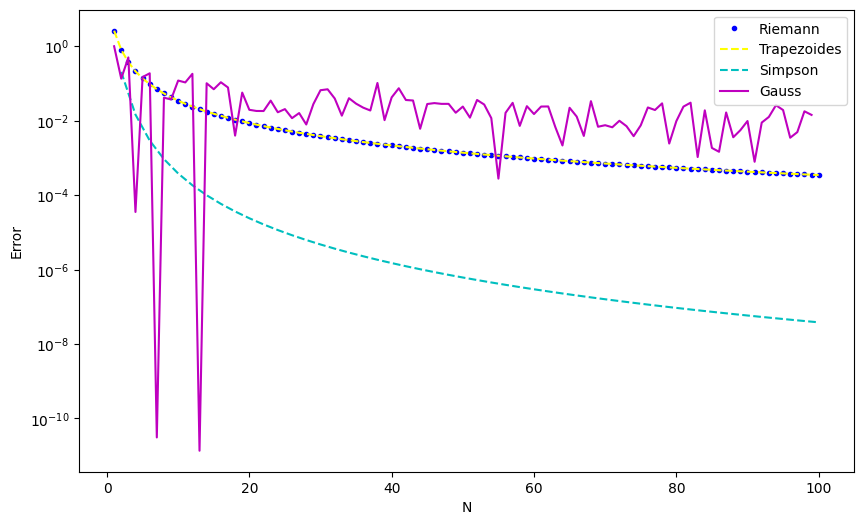

In [106]:
def error(metodo, N, a, b, f):
    I = 0.9453512866
    I_N = 0
    resultado = np.zeros(N.size)
    for i in range(N.size):
        I_N = metodo(a, b, N[i], f)
        resultado[i] = np.abs(I_N - I)/I
    return resultado
def plot_error(a, b, N, N_g):
    N1 = np.linspace(1, N, N, dtype = int)
    N2 = np.linspace(2, N, int(N/2), dtype = int)
    N3 = np.linspace(1, N_g, N_g, dtype = int)
    error_riemann = error(riemann, N1, a, b, f)
    error_trap = error(trapezoide, N1, a, b, f)
    error_simpson = error(simpson, N2, a, b, f)
    error_gauss = error(gauss, N3, a, b, f)

    plt.figure(figsize=(10, 6))
    plt.plot(N1, error_riemann, ".", color= "blue", label= "Riemann")
    plt.plot(N1, error_trap, "--", color= "yellow", label= "Trapezoides")
    plt.plot(N2, error_simpson, "c--", label= "Simpson")
    plt.plot(N3, error_gauss, "m", label= "Gauss")
    plt.yscale('log')
    plt.xlabel("N")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
    

plot_error(-1, 1, N, 99)

En este caso, las sumas de Riemann y los trapezoides dan el mismo error debido a los métodos utilizados y las propiedades de la función, que es simétrica respecto al eje X y el intervalo evaluado, donde $f(a)=f(b)$. La suma de Riemann se evalúa en el extremo derecho y la de trapezoides toma el promedio de los extremos, resultando en el mismo valor. En general, Simpson produce un mejor resultado con menor error, mientras que la cuadratura de Gauss muestra variaciones significativas en los resultados dependiendo de N.

## Segunda parte: FFT


Suponga que encedemos una luz en el tiempo $ t = t_0 − τ /2$ y la volvemos a apagar en el tiempo $t = t_0 + τ /2$, donde $t_0 $ y τ son
parametros constantes. La luz emitida en este periodo de tiempo tiene frecuencia ν_0, la cual tambien es un parametro constante.
El campo electrico emitido tiene la forma

\begin{equation}
E(t) = E_0e−2iπν_0t
\end{equation}

si $t_0 − τ/2 ≤ t ≤ t_0 + τ/2$. E(t) = 0 de otra forma. 

Aplique la transformada de Fourier rapida para encontrar la forma del campo en el espacio de frecuencias. Es decir, queremos
evaluar de forma numerica

\begin{equation}
E(ν) =\int_{t_0+τ /2}^{t_0−τ /2}
dνE_0e^{2πi}(ν−ν_0)t 
\end{equation}

Realice un gr´afico de E(t)/E0 y de ˆE(ν)/E0. Note que estos campos son complejos, realice un gr´afico de ambas partes real
e imaginaria. Utilice los siguientes par´ametros: τ = 1s, t0 = 10s, ν0 = 5 Hz.

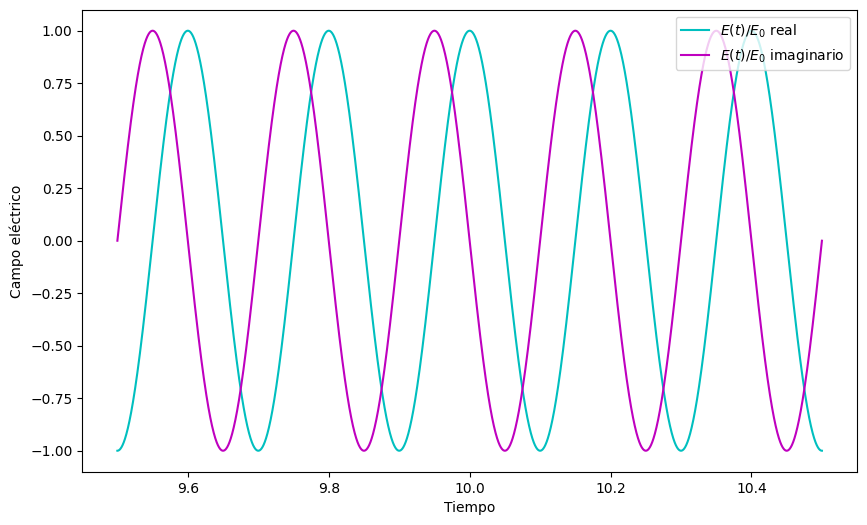

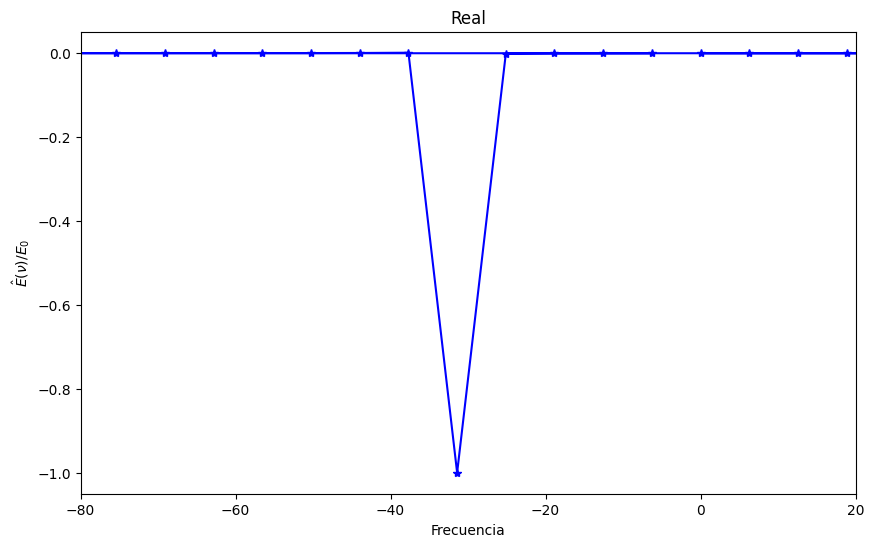

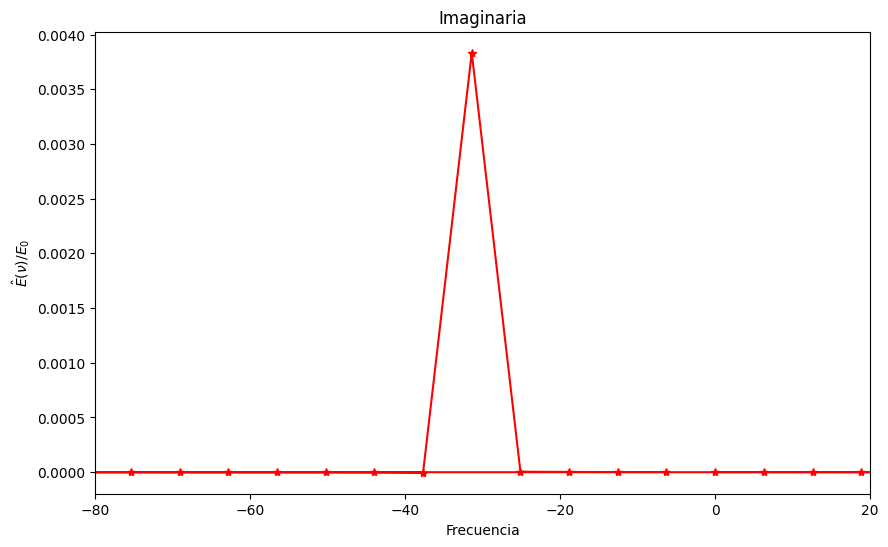

In [107]:
import cmath as cm

def func(t, v_0, E_0):
    return E_0 * cm.exp(-2j*cm.pi*v_0*t)

def fourier(t_0, tau, v_0, N, E_0):
    a = t_0 - (tau/2)
    b = t_0 + (tau/2)
    t_vals = np.linspace(a, b, int(N))
    E_t = np.zeros(N, dtype=complex )
    for i in range(N):
        E_t[i] = func(t_vals[i], v_0, E_0)
    fourier_t = np.fft.fft(E_t, norm="forward")
    freq = np.fft.fftfreq(len(fourier_t), d=t_vals[1]-t_vals[0])
    return E_t, fourier_t, freq, t_vals


def main(t_0, tau, v_0, N, E_0):

    E_t, fft, w, t_vals = fourier(t_0, tau, v_0, N, E_0)

    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, np.real(E_t/E_0), 'c', label="$E(t)/E_0$ real")
    plt.plot(t_vals, np.imag(E_t/E_0), 'm', label="$E(t)/E_0$ imaginario")
    plt.xlabel("Tiempo")
    plt.ylabel("Campo eléctrico")
    plt.legend(loc="upper right")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.xlabel("Frecuencia")
    plt.ylabel(r"$\hat{E}(\nu)/E_0$")
    plt.plot(w*(2.0*np.pi), np.real(fft/E_0), 'b-*', label=r"$\hat{E}(\nu)/E_0$ real")
    plt.title("Real")
    plt.xlim(-80, 20)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.xlabel("Frecuencia")
    plt.ylabel(r"$\hat{E}(\nu)/E_0$")
    plt.plot(w*(2.0*np.pi), np.imag(fft/E_0), 'r-*', label=r"$\hat{E}(\nu)/E_0$ imaginario")
    plt.title("Imaginaria")
    plt.xlim(-80, 20)
    plt.show()

main(10, 1, 5, 4096, 1)

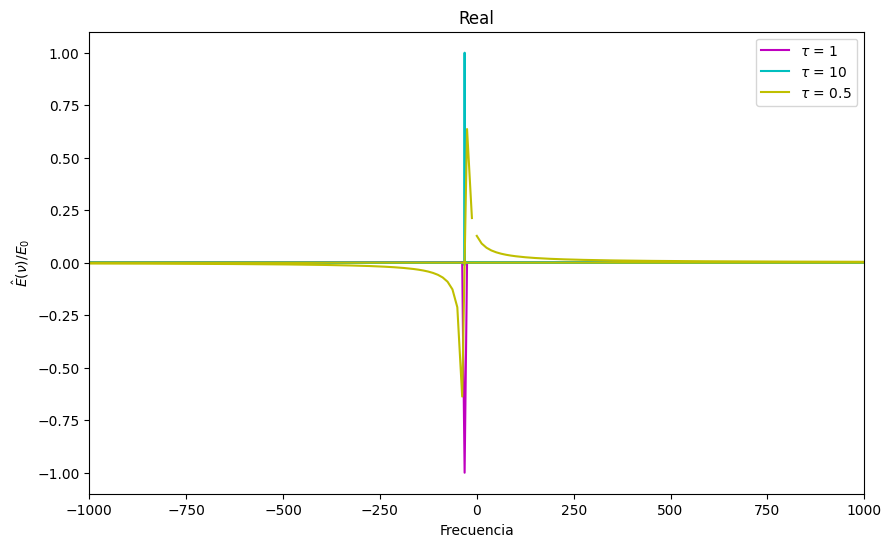

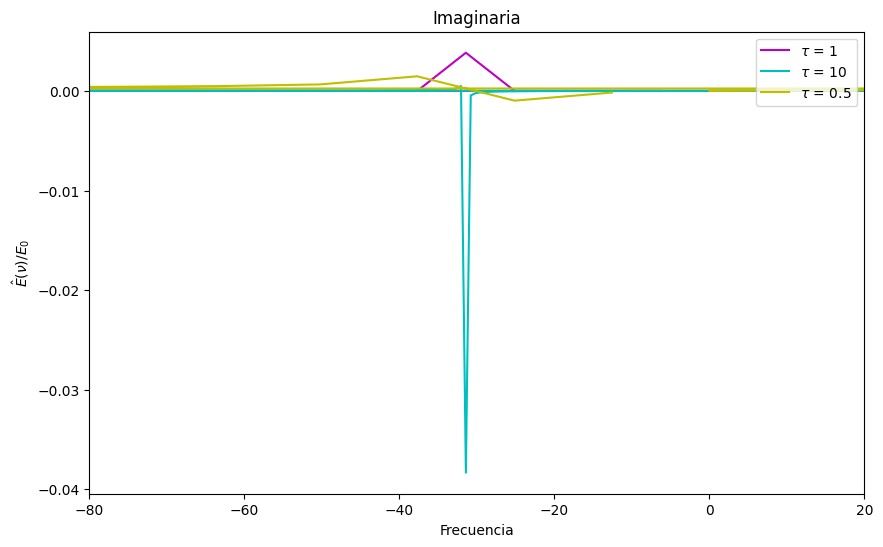

In [108]:
def variacion(t_0, v_0, N, E_0, t1, t2, t3):
    
    E_t1, fft1, w1, t1_vals = fourier(t_0, t1, v_0, N, E_0)
    E_t2, fft2, w2, t2_vals = fourier(t_0, t2, v_0, N, E_0)
    E_t3, fft3, w3, t3_vals = fourier(t_0, t3, v_0, N, E_0)

    plt.figure(figsize=(10, 6))
    plt.title("Real")
    plt.xlabel("Frecuencia")
    plt.ylabel(r"$\hat{E}(\nu)/E_0$")
    plt.xlim(-1000, 1000)
    plt.plot(w1*2*np.pi, np.real(fft1/E_0), 'm', label = r"$\tau$ = %d" %(t1))
    plt.plot(w2*2*np.pi, np.real(fft2/E_0), 'c', label = r"$\tau$ = %d" %(t2))
    plt.plot(w3*2*np.pi, np.real(fft3/E_0), 'y-', label = r"$\tau$ = %.1f" %(t3))
    plt.legend(loc= 'upper right')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.title("Imaginaria")
    plt.xlabel("Frecuencia")
    plt.ylabel(r"$\hat{E}(\nu)/E_0$")
    plt.xlim(-80,20)
    plt.plot(w1*2*np.pi, np.imag(fft1/E_0), 'm', label = r"$\tau$ = %d" %(t1))
    plt.plot(w2*2*np.pi, np.imag(fft2/E_0), 'c', label = r"$\tau$ = %d" %(t2))
    plt.plot(w3*2*np.pi, np.imag(fft3/E_0), 'y-', label = r"$\tau$ = %.1f" %(t3))
    plt.legend(loc= 'upper right')
    plt.show()
variacion(10, 5, 4096, 1, 1, 10, 0.5)

Las potencias de 2 hacen posibles las bisecciones para que el último punto sólo sea un término.
En el espacio de frecuencias, un $\tau$  mayor implica una mayor emisión de campo eléctrico en la parte real, mientras que en la parte imaginaria, el campo se vuelve más negativo con valores grandes de $\tau$  y casi inexistente con valores pequeños.

## Tercera parte: Ecuaciones parabolicas

Ecuacion de Laplace en dos dimensiones para el potencial electrostatico $φ = φ(x, y)$
\begin{equation}
\frac{∂φ^2}{∂x^2 }+ \frac{∂φ^2}{∂y^2 } = 0
\end{equation}
Para una placa cuadrada 10cmx10cm con el metodo de relajacion de Jacobi hasta converger con una tolerancia de 10−5.

In [109]:
import numpy as np

def jacobi_relaxation(M, V, tolerance):
    # Primero creamos los arreglos 2-dimensionales de la grilla
    # Vamos a necesitar dos según la regla de Jacobi
    # Note que usamos M+1, debido a que debemos contener la condición de frontera
    # phi contiene inicialmente los valores iniciales. Vamos a utilizar ceros.
    phi = np.zeros((M + 1, M + 1), dtype=float)
    # Ahora tenemos que colocar la condición inicial.
    # phiprime se necesita para la iteración
    phiprime = np.zeros((M + 1, M + 1), dtype=float)
    # Iteración de Jacobi
    delta = 1.0
    its = 0
    while delta > tolerance:
        # Calculamos la iteración
        its += 1
        for i in range(M):
            for j in range(M):
                # Condición de frontera
                if j == 20 or j == 80:
                    if i >= 20 and i <= 80:
                        if j == 20:
                            phi[i,j] = V
                        else:
                            phi[i,j] = -V
                else:
                    phiprime[i,j]= (0.25)*(phi[i + 1,j]+phi[i - 1,j]+phi[i,j + 1]+phi[i,j - 1])
        # Calculamos la diferencia máxima con respecto a los valores anteriores
        delta = np.max(np.abs(phi - phiprime))
        # Ahora intercambiamos los arreglos para la nueva iteración
        # El nuevo phi es el phiprime
        temp = phi
        phi = phiprime
        # El nuevo phiprime es el phi viejo
        phiprime = temp
        
    return phi, its

In [110]:
jacobi_vals, iterations = jacobi_relaxation(100, 1, 1e-5)
print(iterations)

1751


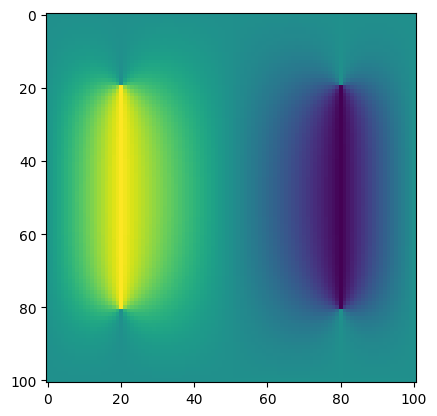

In [111]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(jacobi_vals, cmap='viridis')
plt.show()